# **1)Data Preprocessing:**

# Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.shape

(3999, 12)

In [4]:
df.size

47988

In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
#Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns='ID#',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


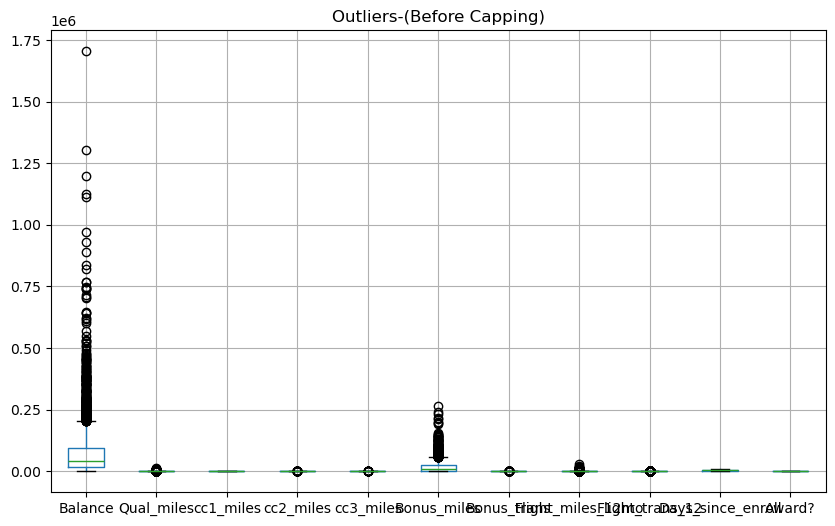

In [10]:
# Outlier detection
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Outliers-(Before Capping)')
plt.show()

In [11]:
#Outlier Capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: Lower_extreme if x<Lower_extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

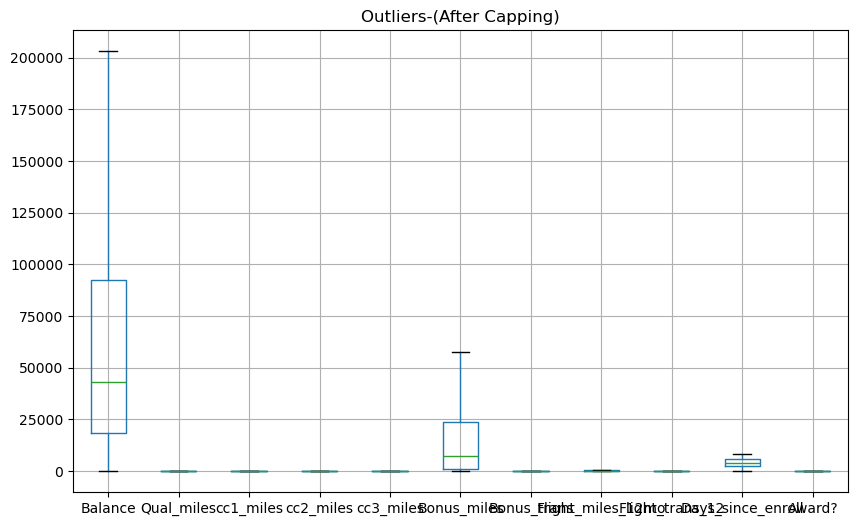

In [12]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Outliers-(After Capping)')
plt.show()

In [13]:
# Scaling
std_slr=StandardScaler()
scaled_df=std_slr.fit_transform(df)
scaled_df=pd.DataFrame(df,columns=df.columns)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0


# Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

# Use multiple visualizations to understand the hidden patterns in the dataset

In [14]:
scaled_df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000


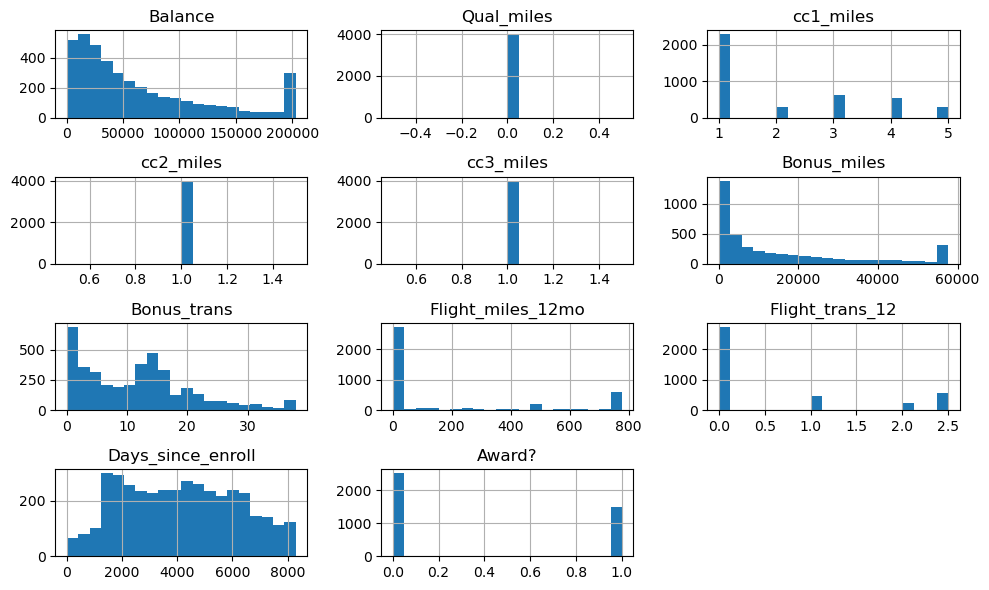

In [15]:
#Histogram
scaled_df.hist(figsize=(10,6),bins=20)
plt.tight_layout()
plt.show()

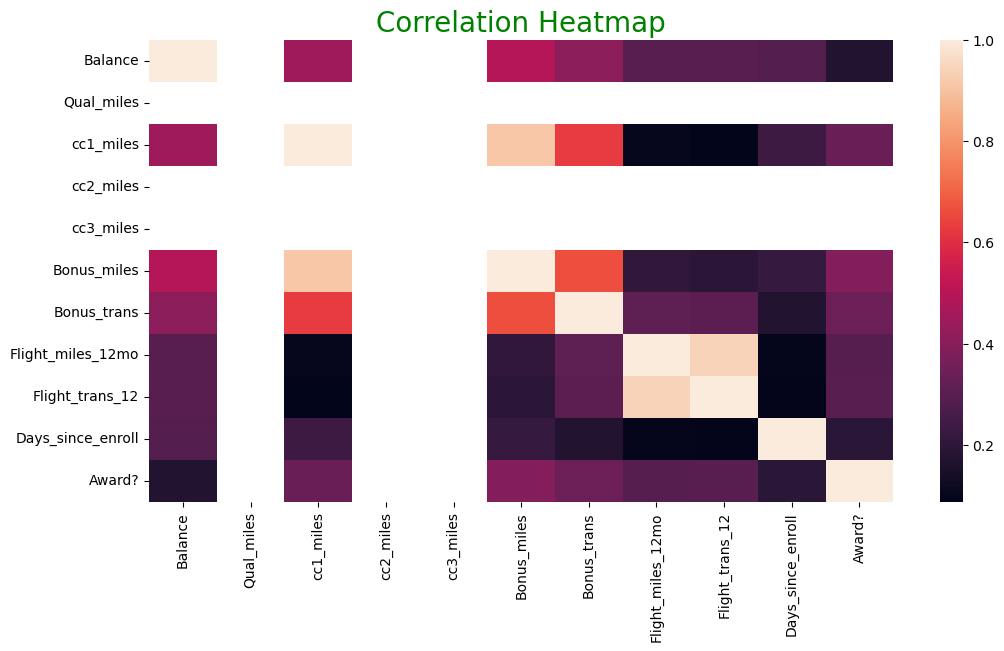

In [16]:
#Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(scaled_df.corr(),annot=False)
plt.title('Correlation Heatmap',color='green',fontsize=20)
plt.show()

# **2)Implementing Clustering Algorithms:**

# **1:K-Means Clustering**

In [17]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=50)
    clusters=kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
print(inertia)

  File "C:\Users\S Tharun Kumar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\S Tharun Kumar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S Tharun Kumar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S Th

[15087056100154.764, 4473200472264.111, 2437718699739.3364, 1719798095562.3848, 1444207785947.8267, 1286621349982.1763, 1041135465114.2173, 874073394360.3146, 727925367392.3087, 658862670457.8958]


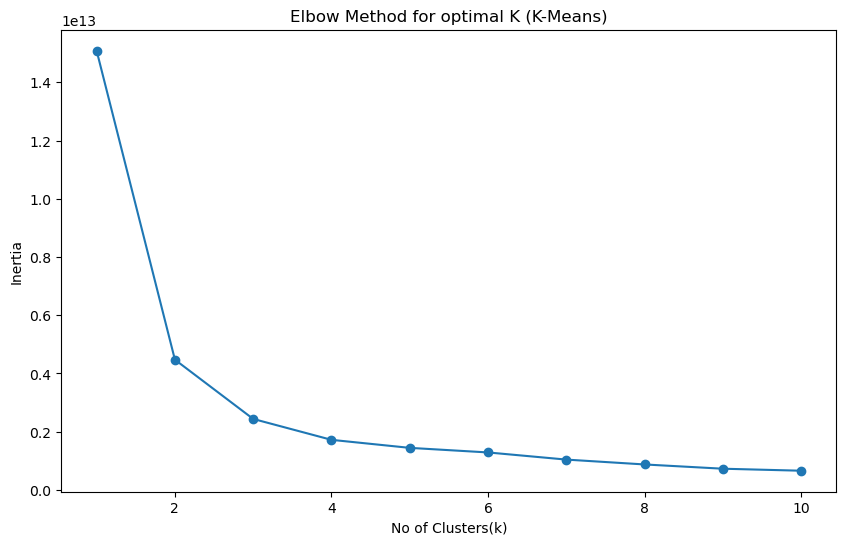

In [18]:
# Elbow method to fing optimal k value
plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia,'o-')
plt.xlabel('No of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K (K-Means)')
plt.show()

In [19]:
kmeans=KMeans(n_clusters=2,random_state=30)
pred=kmeans.fit_predict(scaled_df)

In [20]:
print('K-Means Silhouette Score:',(silhouette_score(scaled_df,pred)))
kmeans_cluster_means=pd.DataFrame(std_slr.inverse_transform(kmeans.cluster_centers_),columns=df.columns)
print('\nK-Means Cluster Centers:\n',kmeans_cluster_means)

K-Means Silhouette Score: 0.6428173784610887

K-Means Cluster Centers:
         Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles   Bonus_miles  \
0  2.038275e+09         0.0   4.476349        2.0        2.0  1.974528e+08   
1  8.979913e+09         0.0   6.182739        2.0        2.0  5.279415e+08   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0   100.073568       40103.985974         1.022871       7.943904e+06   
1   165.051596       91208.815371         1.542491       1.024519e+07   

     Award?  
0  0.529388  
1  0.610068  


In [21]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced=pca.fit_transform(scaled_df)

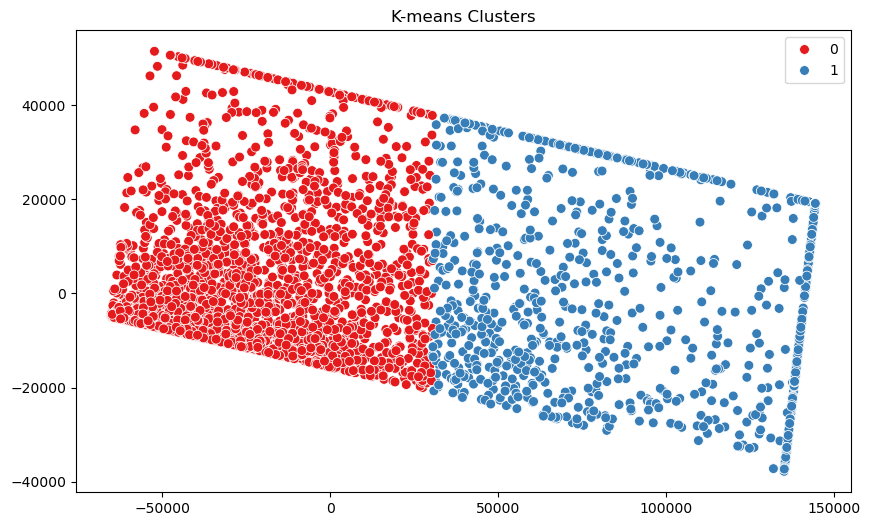

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue=pred,palette='Set1',s=50)
plt.title('K-means Clusters')
plt.show()

# K-Means Clustering – Insights
- The Elbow Method indicated an optimal number of clusters, suggesting a clear structure in the dataset.
- The cluster centroids (after inverse scaling) show distinct patterns among customers:
  - Some clusters are characterized by **higher values in features such as Balance and Bonus_miles**, representing highly engaged or frequent customers.
  - Other clusters show **moderate balances with relatively higher Qual_miles**, indicating occasional customers who still meet qualification criteria.
  - Certain clusters are dominated by customers with **low flight activity and low spending**, representing a "low-value" segment.
- The Silhouette Score indicates that the clusters are reasonably compact and well separated.
- **Interpretation:** K-Means effectively segments customers into meaningful groups, making it suitable for customer profiling and targeted strategies.

# **2:Hierarchical Clustering**

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
optimal_k=5

In [25]:
linkages = ['ward', 'complete', 'average', 'single']
for link in linkages:
    try:
        agg = AgglomerativeClustering(n_clusters=optimal_k, linkage=link, metric='euclidean')
    except TypeError:
        agg = AgglomerativeClustering(n_clusters=optimal_k, linkage=link, affinity='euclidean')

    agg_labels = agg.fit_predict(scaled_df)
    score = silhouette_score(scaled_df,agg_labels)
    print(f"Hierarchical ({link}) Silhouette Score:", score)

Hierarchical (ward) Silhouette Score: 0.400196741882931
Hierarchical (complete) Silhouette Score: 0.45772082604240605
Hierarchical (average) Silhouette Score: 0.3762590595563069
Hierarchical (single) Silhouette Score: 0.3196570827713217


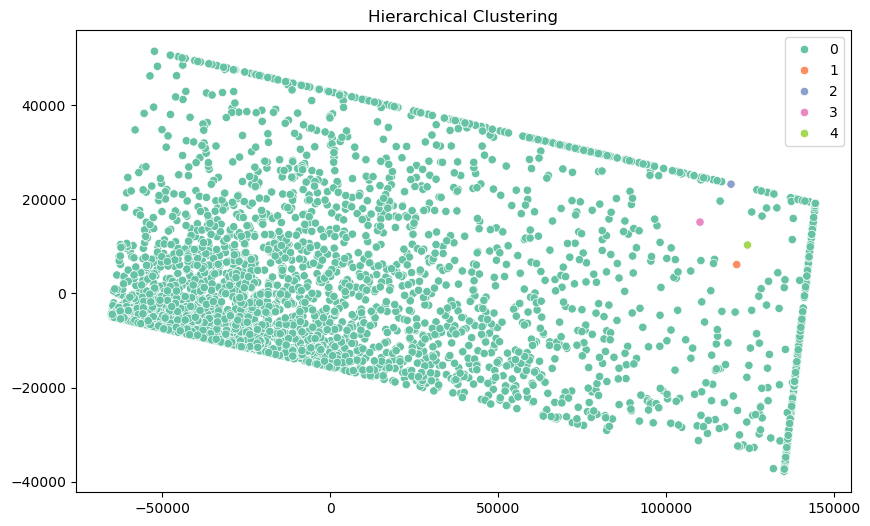

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue=agg_labels,palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

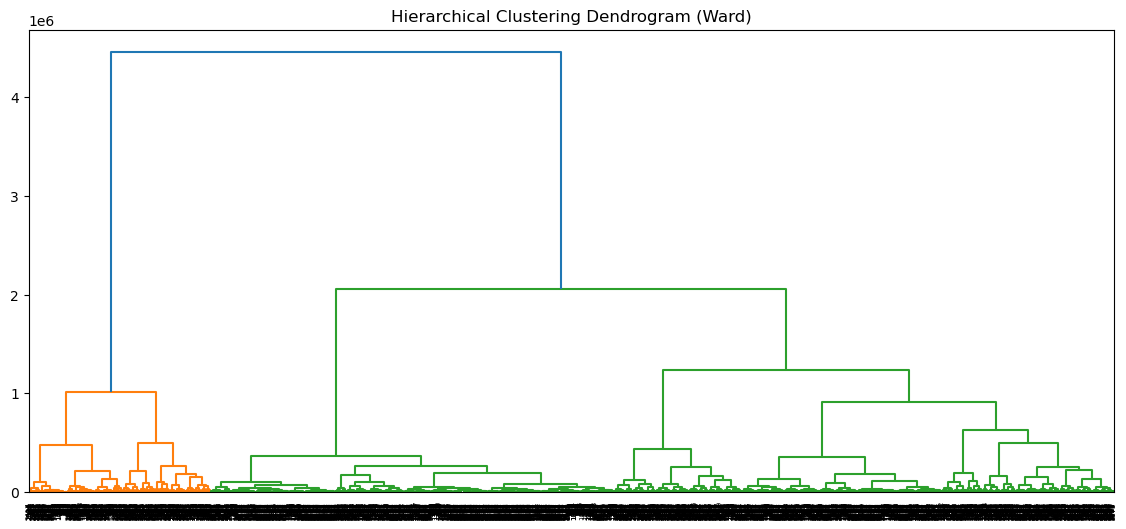

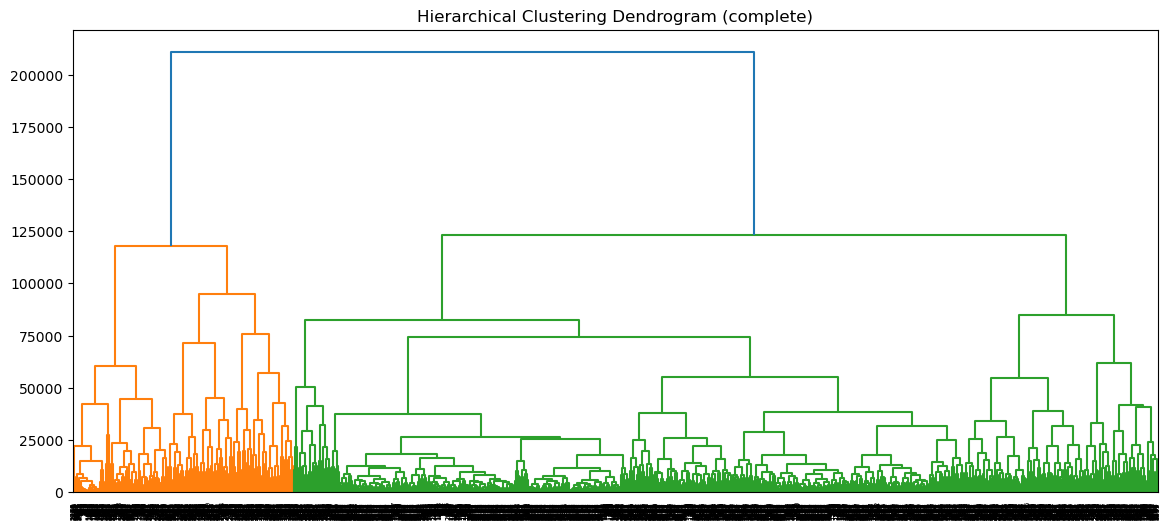

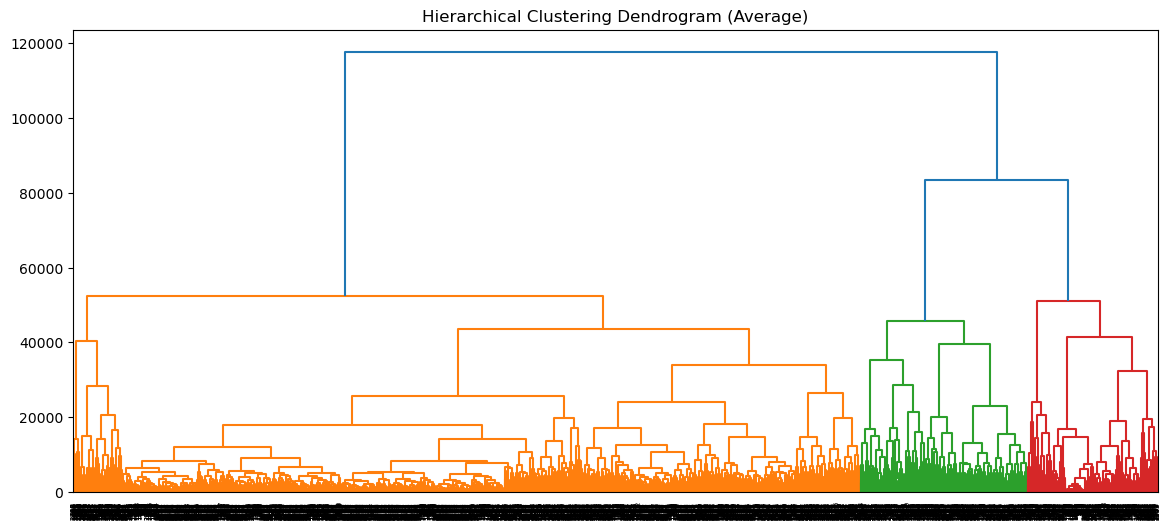

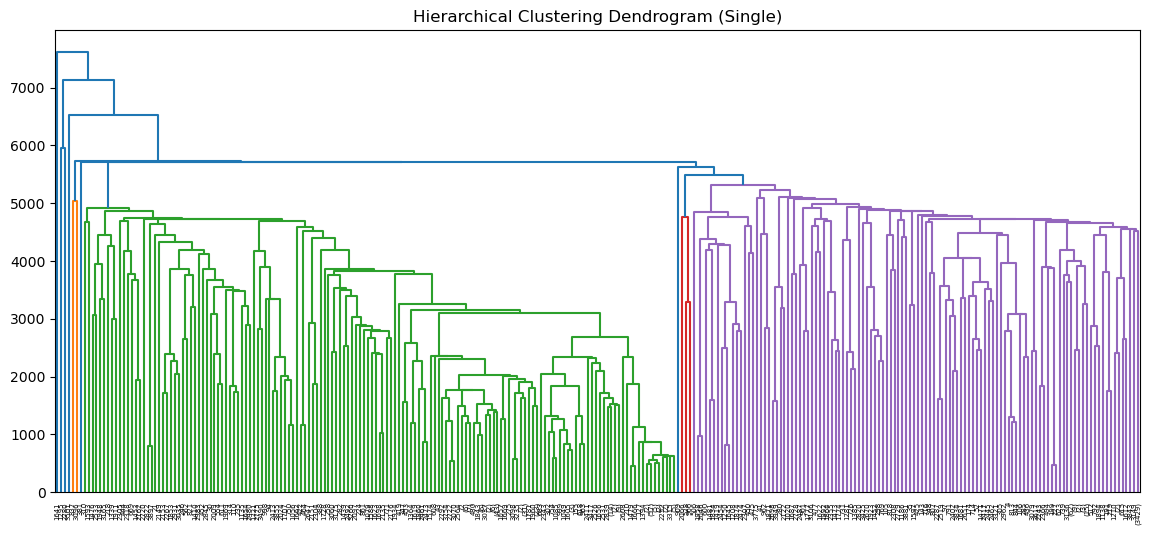

In [27]:
# Dendrogram with Ward linkage
from scipy.cluster.hierarchy import dendrogram,linkage 

linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(14,6))
dendrogram(linked, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.show()

linked_complete=linkage(scaled_df,method='complete')
plt.figure(figsize=(14,6))
dendrogram(linked_complete,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (complete)')
plt.show()

plt.figure(figsize=(14,6))
linked_avg=linkage(scaled_df,method='average')
dendrogram(linked_avg,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.show()

plt.figure(figsize=(14,6))
linked_single=linkage(scaled_df,method='single')
dendrogram(linked_single,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.show()

# Hierarchical Clustering – Insights
- Hierarchical clustering revealed a clear cluster structure, as observed from the dendrogram.
- The dataset was divided into distinct groups with varying sizes, indicating heterogeneity among customers.
- Each cluster shows different feature distributions, confirming the presence of meaningful groupings.
- The visualization supports the clustering results by showing noticeable separation between clusters.
- **Interpretation:** Hierarchical clustering provides an interpretable view of customer segmentation and complements the K-Means results.

# **3:DBSCAN Clustering**

In [28]:
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
min_samples=range(2,11)

I did not use min_samples = 1 because it makes DBSCAN trivial by treating each point as a cluster. DBSCAN is meant to find dense groups of points, so min_samples should be at least 2 to form meaningful clusters.

In [29]:
output=[]
for i in eps:
    for j in min_samples:
        labels=DBSCAN(eps=i,min_samples=j).fit_predict(scaled_df)
        unique_labels = set(labels)-{-1}
        if len(unique_labels)>1:
            score=silhouette_score(scaled_df,labels)
            output.append([i,j,score])
        else:
            output.append([i,j,-1])
print(output)

[[0.1, 2, -1], [0.1, 3, -1], [0.1, 4, -1], [0.1, 5, -1], [0.1, 6, -1], [0.1, 7, -1], [0.1, 8, -1], [0.1, 9, -1], [0.1, 10, -1], [0.2, 2, -1], [0.2, 3, -1], [0.2, 4, -1], [0.2, 5, -1], [0.2, 6, -1], [0.2, 7, -1], [0.2, 8, -1], [0.2, 9, -1], [0.2, 10, -1], [0.3, 2, -1], [0.3, 3, -1], [0.3, 4, -1], [0.3, 5, -1], [0.3, 6, -1], [0.3, 7, -1], [0.3, 8, -1], [0.3, 9, -1], [0.3, 10, -1], [0.4, 2, -1], [0.4, 3, -1], [0.4, 4, -1], [0.4, 5, -1], [0.4, 6, -1], [0.4, 7, -1], [0.4, 8, -1], [0.4, 9, -1], [0.4, 10, -1], [0.5, 2, -1], [0.5, 3, -1], [0.5, 4, -1], [0.5, 5, -1], [0.5, 6, -1], [0.5, 7, -1], [0.5, 8, -1], [0.5, 9, -1], [0.5, 10, -1], [0.6, 2, -1], [0.6, 3, -1], [0.6, 4, -1], [0.6, 5, -1], [0.6, 6, -1], [0.6, 7, -1], [0.6, 8, -1], [0.6, 9, -1], [0.6, 10, -1], [0.7, 2, -1], [0.7, 3, -1], [0.7, 4, -1], [0.7, 5, -1], [0.7, 6, -1], [0.7, 7, -1], [0.7, 8, -1], [0.7, 9, -1], [0.7, 10, -1]]


In [30]:
table=pd.DataFrame(output,columns=['eps','min_samples','score'])
table

,eps,min_samples,score
0,0.1,2,-1
1,0.1,3,-1
2,0.1,4,-1
3,0.1,5,-1
4,0.1,6,-1
...,...,...,...
58,0.7,6,-1
59,0.7,7,-1
60,0.7,8,-1
61,0.7,9,-1


In [31]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

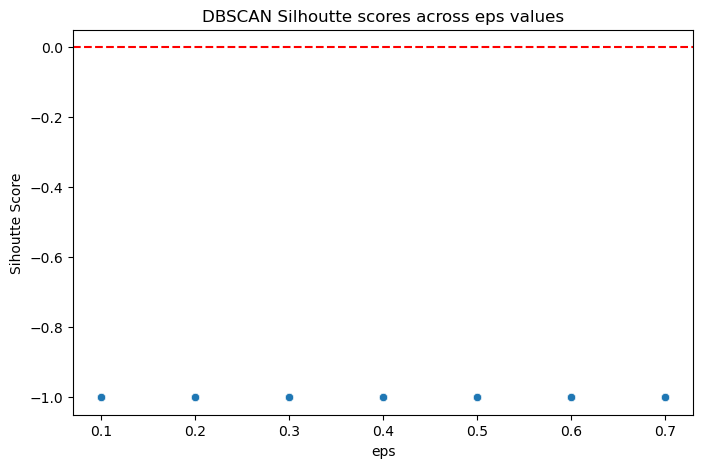

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=table['eps'],y=table['score'])
plt.axhline(0,linestyle='--',color='red')
plt.xlabel('eps')
plt.ylabel('Sihoutte Score')
plt.title('DBSCAN Silhoutte scores across eps values')
plt.show()

From the above graph,A silhouette score of −1 was treated as invalid clustering since DBSCAN failed to form meaningful clusters.

# DBSCAN – Insights
- DBSCAN was unable to form meaningful density-based clusters for this dataset.
- Most data points were classified as **noise (-1)**, resulting in an invalid silhouette score.
- This indicates that the dataset does not contain strong density-separated regions.
- **Interpretation:** DBSCAN is not suitable for this dataset, whereas centroid-based and hierarchical methods perform better.

# --------------------------------------THE END------------------------------------------